# Data Cleanning

### Visualização

In [1]:
import pandas as pd

dfClientes = pd.read_excel('caso_20211115.xlsx', sheet_name='clientes')
dfLojas = pd.read_excel('caso_20211115.xlsx', sheet_name='lojas')
dfProdutos = pd.read_excel('caso_20211115.xlsx', sheet_name='produtos')
dfVendas = pd.read_excel('caso_20211115.xlsx', sheet_name='vendas')
dfPag = pd.read_excel('caso_20211115.xlsx', sheet_name='pagamentos')


In [2]:
dfClientes.isnull().sum()

id         0
nome       4
sexo       4
dt_nasc    4
dtype: int64

In [3]:
dfClientes[dfClientes.isnull().T.any()]

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [4]:
dfClientes.sexo.unique()

array(['F', 'M', nan], dtype=object)

In [5]:
dfClientes[dfClientes.nome.isnull()]

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN


In [6]:
dfPag[dfPag.id==264]

,id,id_venda,dt_pgto
263,264,364,2018-05-21


### Tratando dados NaN

In [7]:
dfClientes.loc[dfClientes.nome.isnull(), 'nome'] = 'Sem Nome'
dfClientes.loc[dfClientes.sexo.isnull(), 'sexo'] = 'O'
dfClientes.loc[dfClientes.dt_nasc.isnull(), 'dt_nasc'] = '1/1/2021'

In [8]:
dfClientes[dfClientes.nome=='Sem Nome']

,id,nome,sexo,dt_nasc
263,264,Sem Nome,F,7/29/1997
264,265,Sem Nome,M,2/7/1979
268,269,Sem Nome,F,1/1/2021
269,270,Sem Nome,M,1/1/2021


In [9]:
dfClientes.isnull().sum()

id         0
nome       0
sexo       0
dt_nasc    0
dtype: int64

In [10]:
dfProdutos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


### Tratando Outliers

In [11]:
dfProdutos.loc[9, 'valor'] = dfProdutos.valor[9]/10000
dfProdutos

,id,produto,valor
0,1,mouse,20.0000
1,2,teclado,30.0000
2,3,laptop básico,2300.0000
3,4,laptop gamer,5300.0000
4,5,monitor,1500.0000
5,6,impressora,700.0000
6,7,carregador,150.0000
7,8,cadeira,540.0000
8,9,mesa,860.0000
9,10,xxx-231a,321.1352


<AxesSubplot:>

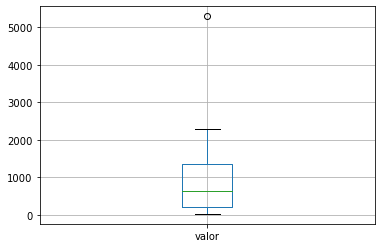

In [12]:
dfProdutos.boxplot(column=['valor'])

In [13]:
dfVendas[~dfVendas.id_cliente.isin(dfClientes.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [14]:
dfVendas[~dfVendas.id_loja.isin(dfLojas.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [15]:
dfVendas[~dfVendas.id_produto.isin(dfProdutos.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [16]:
dfPag[~dfPag.id_venda.isin(dfVendas.id)]

,id,id_venda,dt_pgto


### Vendas que não geraram ID de pagamento

In [17]:
dfVendas[~dfVendas.id.isin(dfPag.id)].count()

id            928
id_cliente    928
id_loja       928
id_produto    928
dt_venda      928
dtype: int64

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

### Tratamento Datas

In [19]:
dfClientes.dt_nasc = pd.to_datetime(dfClientes.dt_nasc, format='%m/%d/%Y')

In [20]:
dfClientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,1975-05-02
1,2,Caio Pereira,M,1978-04-16
2,3,Júlio Azevedo,M,1952-11-04
3,4,Sarah Goncalves,F,1937-02-24
4,5,Gabrielle Martins,F,1953-05-06
...,...,...,...,...
995,996,Ágatha Ribeiro,F,1946-02-08
996,997,Laura Oliveira,F,1979-06-15
997,998,Lara Oliveira,F,1946-03-15
998,999,Julian Cunha,M,1994-06-20


### Dados duplicados

In [21]:
dfClientes[dfClientes.nome.duplicated()]

,id,nome,sexo,dt_nasc
79,80,Anna Melo,F,1999-08-10
96,97,Beatrice Goncalves,F,1964-11-22
138,139,Kauê Araujo,M,1974-05-31
139,140,Leonor Sousa,F,1981-08-02
154,155,Luis Rodrigues,M,1973-07-03
...,...,...,...,...
986,987,Beatriz Cardoso,F,1984-07-17
990,991,Diogo Melo,M,2001-07-24
993,994,Eduardo Costa,M,1963-12-18
996,997,Laura Oliveira,F,1979-06-15


In [22]:
dfClientes.duplicated().sum()

0

In [23]:
dfLojas.duplicated().sum()

0

In [24]:
dfProdutos.duplicated().sum()

0

In [25]:
dfVendas[dfVendas.drop('id',axis=1).duplicated()]

,id,id_cliente,id_loja,id_produto,dt_venda
496,497,559,2,5,2018-06-22


### Index

In [26]:
dfVendas = dfVendas.set_index('id')
dfClientes = dfClientes.set_index('id')
dfLojas = dfLojas.set_index('id')
dfPag = dfPag.set_index('id')
dfProdutos = dfProdutos.set_index('id')


In [28]:
dfLojas

,cidade
id,
1,São Paulo
2,Rio de Janeiro
3,Curitiba
4,Belo Horizonte
5,Santa Catarina
6,Recife
7,Salvador
8,Brasília
9,Palmas
